In [72]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

from ising_model import Ising2DWolff
from monte_carlo import wolff_algorithm


np.random.seed(0)
torch.manual_seed(0)


def run_exp(L, step_num, T):
    ising = Ising2DWolff(L, )
    logger = wolff_algorithm(ising, 1, 1000, flip_all=False)
    pickle.dump(logger, open(f'./save/2d_ising_model_L={L}_T={T}_step_num={step_num}.pkl', 'wb'))
    return logger


def load_logger(L, step_num, T):
    logger = pickle.load(open(f'./save/2d_ising_model_L={L}_T={T}_step_num={step_num}.pkl', 'rb'))
    return logger



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


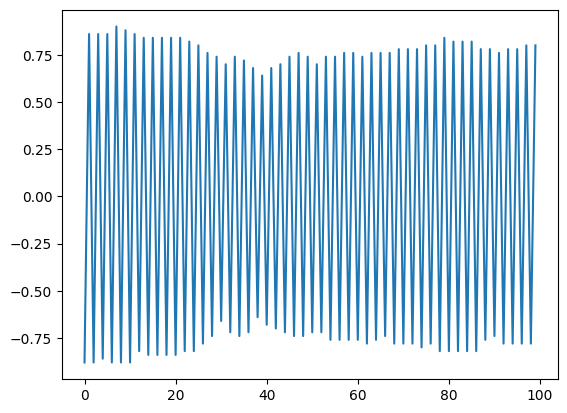

In [77]:
logger = run_exp(10, 1000, 3)
fig, ax = plt.subplots(1, 1)
ax.plot(logger.states[-100:, 0, :, :].mean((-1, -2)))

In [78]:
# run and save

for T in np.linspace(1, 3, 100):
    for L in [5, 10, 20]:
        run_exp(L, 1000, T)

 89%|████████▉ | 890/1000 [00:27<00:03, 32.13it/s]


KeyboardInterrupt: 